In [1]:
import numpy as np
import find_filter_coefficients as find_fc
import find_wavelet_coefficients as fwc
import fitness_function as ff
import matplotlib.pyplot as plt
import load_data as ld
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
req_records = [100, 102, 104, 105, 106, 107, 118, 119, 200, 201, 202, 203, 205, 
                    208, 209, 212, 213, 214, 215,217]
req_classes = ["N", "L", "R", "A", "V", "/"]

data = ld.load_mit_datset(req_records, req_classes)
# label_counts = data.iloc[:, -1].value_counts()

In [3]:
print("Number of samples for each label:",data["label"].value_counts(),"\n")
print("Number of data",data.shape[0])

Number of samples for each label: label
N    29649
/     6975
V     4424
R     3969
L     1990
A      636
Name: count, dtype: int64 

Number of data 47643


Train test set split

In [4]:
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Labels (the last column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.992, random_state=42, stratify=y) # test_size = 0.99737 for 125 training data

train_data = X_train.copy()
train_data['label'] = y_train

test_data = X_test.copy()
test_data['label'] = y_test

print("Training set size:", train_data.shape)
print("Test set size:", test_data.shape)

Training set size: (381, 304)
Test set size: (47262, 304)


In [19]:
N = 20  # Filter order 
L = 3  # Number of levels in the wavelet decomposition

S = 10 # Number of particles in the swarm(Swarm size)
d = int(N/2) # Dimension of the search space

# Initialize the position vectors with random values uniformly distributed in [0, 2π)
positions = np.random.uniform(0, 2 * np.pi, (S, d))

# Initialize the velocity vectors to zero
velocities = np.zeros((S, d))
fitness = np.zeros((S))
c1=0
c2=1
w=0.75
iterations=20

In [20]:
# personal best_position vector 
#   first 10 numbers in a row -- best positions
#   11h number in a row       -- respective fitness value

# Initialize personal best positions as the starting positions
personal_best_positions = np.zeros((S, d + 1))

# Copy initial positions to personal best positions
personal_best_positions[:, :-1] = positions  # Store positions in the first d columns

# Store corresponding fitness values
for i in range(S):
    personal_best_positions[i, -1] = fitness[i]  # Last column for fitness values

global_best_position = personal_best_positions[np.argmax(personal_best_positions[:, -1]), :-1]  # Exclude fitness from best position

In [21]:
# PSO loop
for t in range(iterations):

    X_train_combined=ld.update_wavelet_coefficients(X_train, positions)
    fitness=ff.fitness_function_CV(X_train_combined,y_train)

    #Update Global and Personal best 
    for i in range(S):
        if fitness[i]> personal_best_positions[i,-1]:
            personal_best_positions[i,:-1] = positions[i,:]
            personal_best_positions[i,-1] = fitness[i]

    global_best_position = personal_best_positions[np.argmax(personal_best_positions[:, -1]), :-1]  # Exclude fitness from best position
    
    for i in range(S):

        # Random weights from uniform distribution [0,1]
        r1, r2 = np.random.rand(), np.random.rand()

        for j in range(d):

            # Calculate velocity based on inertia, cognitive, and social components
            velocities[i,j] = (
                w * velocities[i,j] +
                c1 * r1 * (personal_best_positions[i,j] - positions[i,j]) +
                c2 * r2 * (global_best_position[j] - positions[i,j])
            )

            # Update position based on the new velocity
            positions[i,j] += velocities[i,j]



train set size (10, 381, 339)
train set size (10, 381, 339)
train set size (10, 381, 339)
train set size (10, 381, 339)
train set size (10, 381, 339)
train set size (10, 381, 339)
train set size (10, 381, 339)


KeyboardInterrupt: 

In [8]:
print("best fitness score is = ",personal_best_positions[np.argmax(personal_best_positions[:, -1]),-1])
print("global best position is \n ", global_best_position)

best fitness score is =  0.955434039644566
global best position is 
  [2.21381192 7.08097104 3.04693774 5.24934487 4.56564047 3.53031542
 2.93198558 2.15782656 1.31110485 4.05277789]


In [15]:
v_l = find_fc.lowpass_filter(global_best_position)
v_h = find_fc.high_pass_filter(global_best_position)

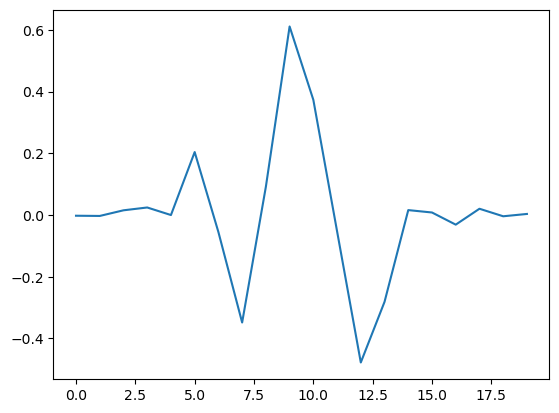

In [17]:
import matplotlib.pyplot as plt
plt.plot(v_l)

In [10]:
generate_plot= ld.update_wavelet_coefficients(X_train[10,:],global_best_position)



InvalidIndexError: (10, slice(None, None, None))

In [ ]:
generate_plot